<a href="https://colab.research.google.com/github/irajamuller/quantum_computing/blob/main/Execu%C3%A7%C3%A3o_em_Computador_Qu%C3%A2ntico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PASSO 1
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution, plot_histogram, plot_circuit_layout
import qiskit.quantum_info as qi

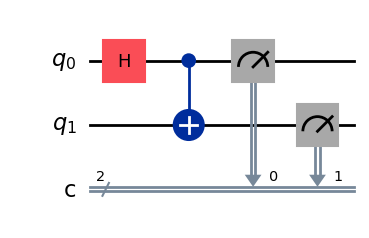

In [ ]:
# PASSO 2
qc = QuantumCircuit(2, 2)
qc.h(0)
#qc.save_statevector(label='superposicao')
qc.cx(0, 1)
#qc.save_statevector(label='cnot')
qc.measure([0, 1], [0, 1])
qc.draw('mpl')

In [ ]:
# PASSO 3
backend = AerSimulator(method='statevector')
# Operações desse simulador
#backend.operations

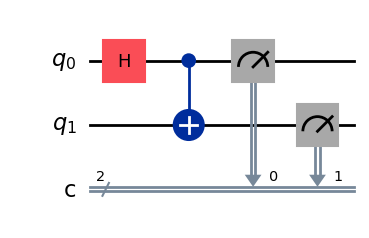

In [ ]:
# PASSO 4
# Transpilar: pega-se o circuito e reajusta conforme simulador/real (ajuste de portas)
qc_t = transpile(qc, backend)
qc_t.draw('mpl')

In [ ]:
# PASSO 5
job = backend.run(qc_t, shots=1000)

result = job.result()
counts = result.get_counts()

In [ ]:
# Somente se o save statevector estiver habilitado na ETAPA 1
array_to_latex(result.data(0)['cnot'])

<IPython.core.display.Latex object>

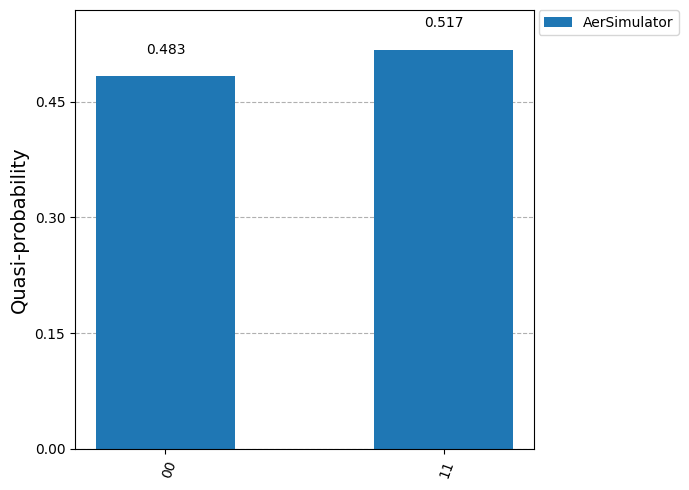

In [ ]:
# PASSO 6
plot_distribution(counts, legend=['AerSimulator'])

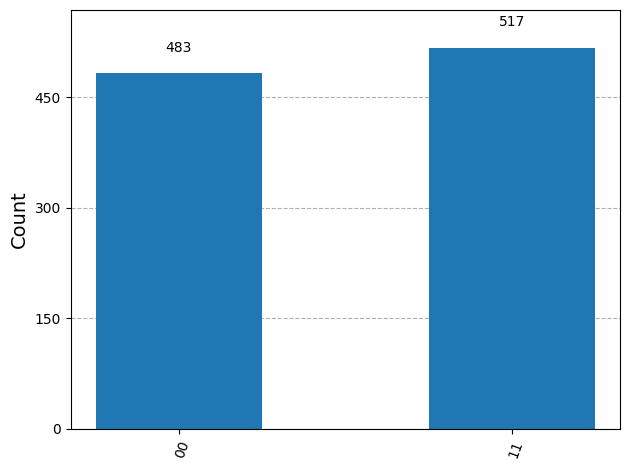

In [ ]:
plot_histogram(counts)

In [ ]:
# PASSO 3 - Para Computadores Quânticos Reais
# https://quantum.cloud.ibm.com/
service = QiskitRuntimeService()

# Teste listando os backends disponíveis
print(service.backends())

real_computer = service.least_busy(operational=True, simulator=False)
print(real_computer)

backend = service.backend(real_computer.name)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]
<IBMBackend('ibm_brisbane')>


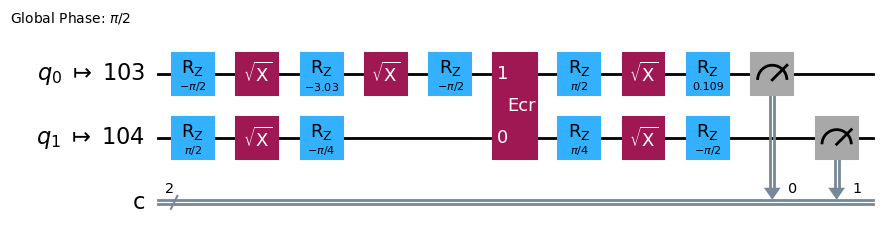

In [ ]:
# PASSO 4
qc_t = transpile(qc, backend)
qc_t.draw('mpl')

In [ ]:
# PASSO 5
sampler = SamplerV2(backend)
job = sampler.run([(qc_t, None, 1_000)])

job_id = job.job_id()
print(job_id)

d2npgplpoa4c73c750g0


In [ ]:
# PASSO 6
job = service.job(job_id)
print(job.status())
if job.status() == 'DONE':
    result = job.result()
    real_counts = result[0].data.c.get_counts()


DONE


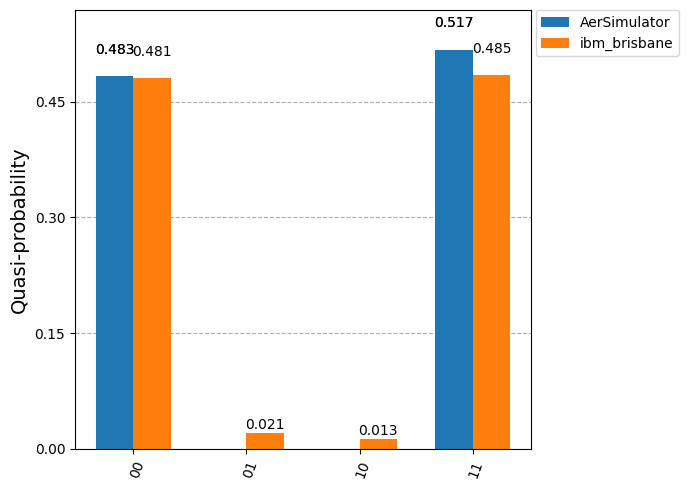

In [ ]:
# PASSO 7 - em conjunto com a execução em simulador
plot_distribution([counts, real_counts], legend=['AerSimulator', real_computer.name])

In [ ]:
config = backend.configuration()
print('Portas suportadas: ', config.basis_gates)

Portas suportadas:  ['ecr', 'id', 'rz', 'sx', 'x']


In [ ]:
config = backend.configuration()
print(config.coupling_map)

[[1, 0], [2, 1], [3, 2], [4, 3], [4, 5], [4, 15], [6, 5], [6, 7], [7, 8], [8, 9], [10, 9], [10, 11], [11, 12], [12, 17], [13, 12], [14, 0], [14, 18], [15, 22], [16, 8], [16, 26], [17, 30], [18, 19], [20, 19], [20, 33], [21, 20], [21, 22], [22, 23], [24, 23], [24, 34], [25, 24], [26, 25], [27, 26], [28, 27], [28, 29], [28, 35], [30, 29], [30, 31], [31, 32], [32, 36], [33, 39], [34, 43], [35, 47], [36, 51], [37, 38], [39, 38], [40, 39], [40, 41], [41, 53], [42, 41], [42, 43], [43, 44], [44, 45], [46, 45], [46, 47], [48, 47], [48, 49], [50, 49], [50, 51], [52, 37], [52, 56], [53, 60], [54, 45], [54, 64], [55, 49], [55, 68], [56, 57], [57, 58], [58, 59], [58, 71], [59, 60], [60, 61], [62, 61], [62, 63], [62, 72], [63, 64], [65, 64], [65, 66], [67, 66], [67, 68], [69, 68], [69, 70], [73, 66], [74, 70], [74, 89], [75, 90], [76, 75], [77, 71], [77, 76], [77, 78], [79, 78], [79, 80], [80, 81], [81, 72], [81, 82], [82, 83], [83, 92], [84, 83], [85, 73], [85, 84], [85, 86], [86, 87], [87, 88], [

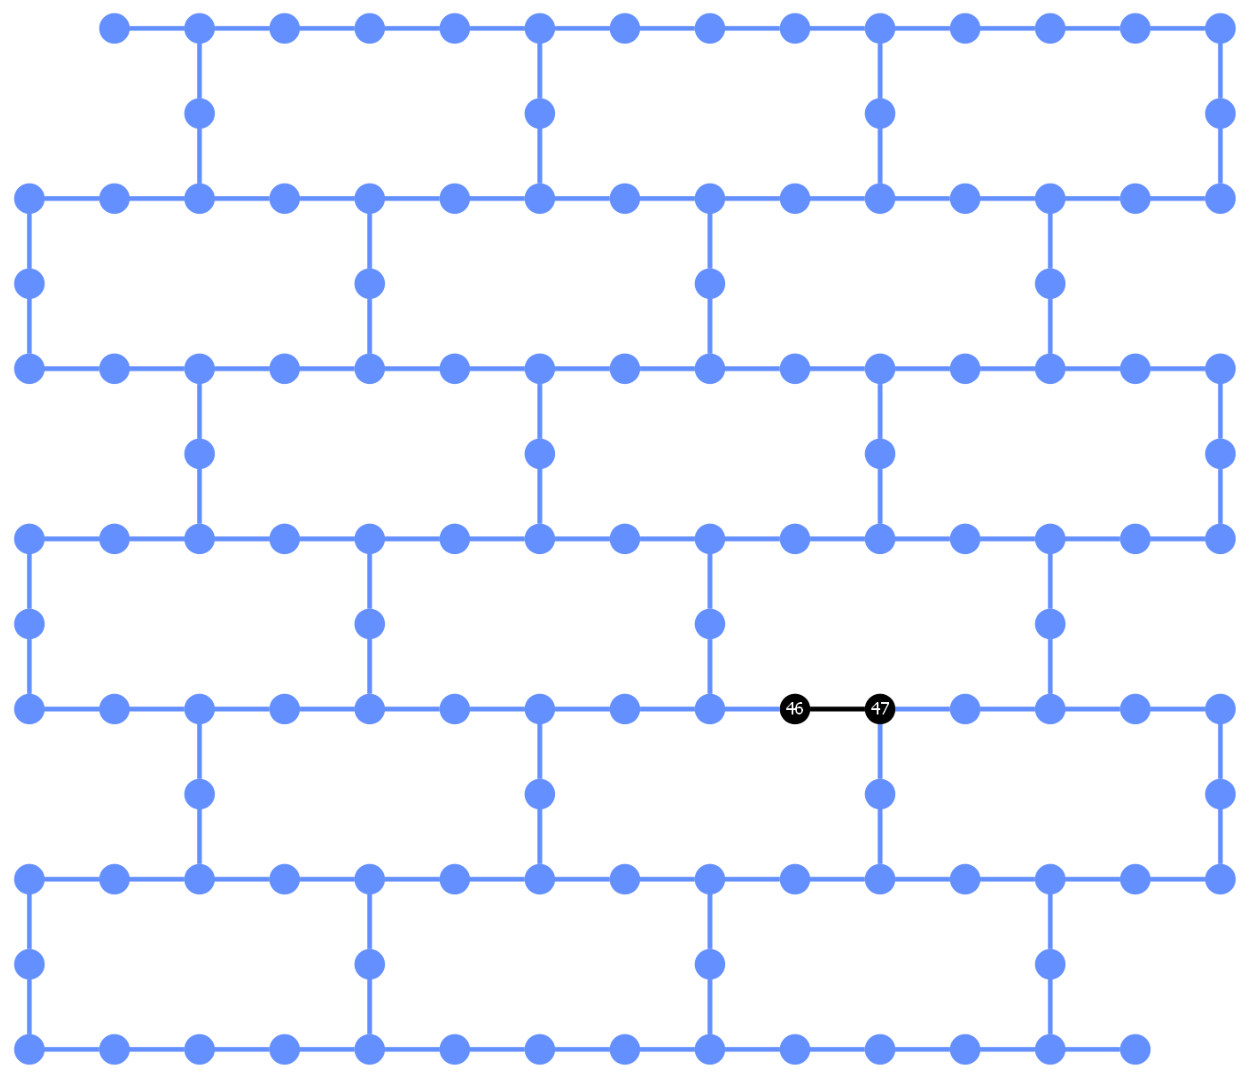

In [ ]:
plot_circuit_layout(qc_t, backend, view="physical")
plt.show()